<a href="https://colab.research.google.com/github/sarincr/101-Sessions-on-Project-based-learning/blob/master/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


In [2]:
import yfinance as yf

# Define Tesla ticker
tesla = yf.Ticker("TSLA")

# Get Tesla historical stock data
tesla_stock_data = tesla.history(period="max")

# Display the first few rows
print(tesla_stock_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [3]:
# Reset the index
tesla_stock_data.reset_index(inplace=True)

# Save to CSV
tesla_stock_data.to_csv("tesla_stock_data.csv", index=False)

# Display the first five rows
print(tesla_stock_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [11]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")

# Get revenue data from financials
tesla_revenue = tesla.financials.loc["Total Revenue"].to_frame().T

# Display the last five rows
print(tesla_revenue.tail())


                  2024-12-31     2023-12-31     2022-12-31     2021-12-31  \
Total Revenue  97690000000.0  96773000000.0  81462000000.0  53823000000.0   

              2020-12-31  
Total Revenue        NaN  


In [15]:
# Download GameStop stock data
gme = yf.Ticker("GME")

# Get historical market data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Save to CSV
gme_data.to_csv("gme_data.csv", index=False)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [16]:
# Get revenue data from financials
gme_revenue = gme.financials.loc["Total Revenue"].to_frame().T

# Display the last five rows
print(gme_revenue.tail())

                 2024-01-31    2023-01-31    2022-01-31    2021-01-31
Total Revenue  5272800000.0  5927200000.0  6010700000.0  5089800000.0


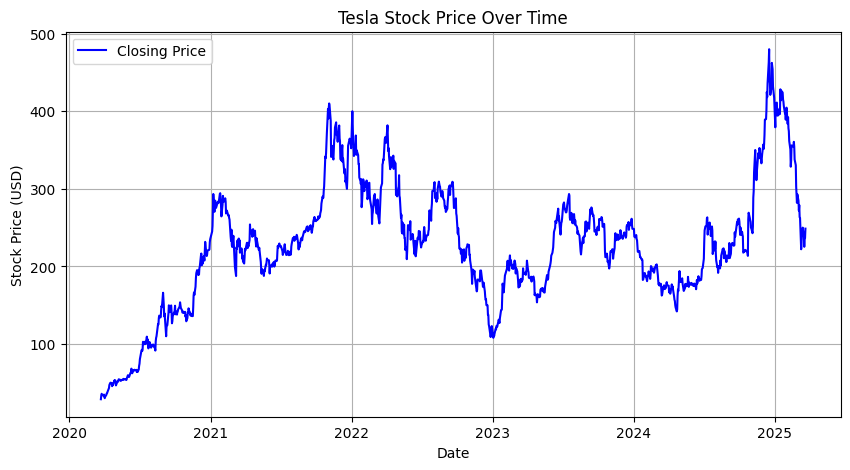

In [18]:
import matplotlib.pyplot as plt
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data["Close"], label="Closing Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")  # Get last 5 years of data

# Call the function to make the graph
make_graph(tesla_data, "Tesla Stock Price Over Time")

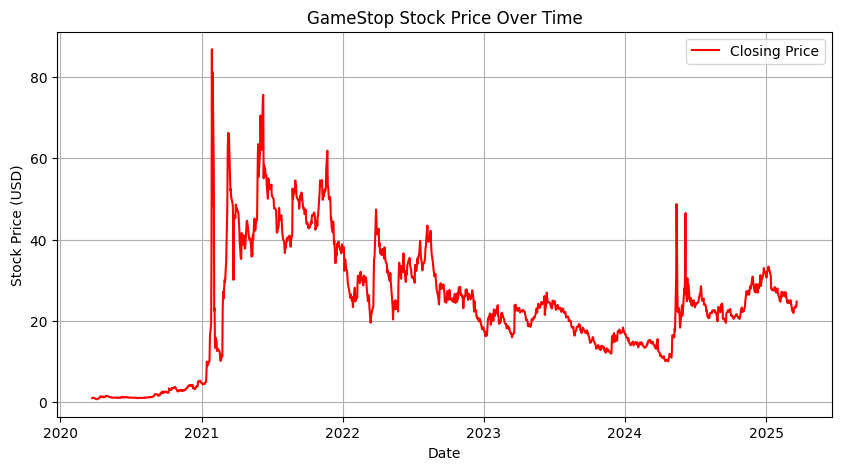

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to plot stock data
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data["Close"], label="Closing Price", color="red")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")  # Get last 5 years of data

# Call the function to make the graph
make_graph(gme_data, "GameStop Stock Price Over Time")
